In [4]:
import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from tensorflow import keras 
import tensorflow as tf

# Dataset Generatin

In [5]:
import glob
from PIL import Image
from io import BytesIO

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
datagen_new = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        data_format='channels_last', 
        brightness_range=[0.5, 1.5]
)

 
images=glob.glob("F:\BD MSc\Jahangirnagar MSc\MSc Research\Leaf Disease\Corn Leaves Diseases Detection\Implementation\Eye Spot Disease\Perfect\*.*")
for image in images:
    img = Image.open(image)
    output = BytesIO()
    
    if img.mode == "JPEG":
        img.save(output, format='JPEG', quality=95)
    elif img.mode in ["RGBA", "P"]:
        img = img.convert("RGB")
        img.save(output, format='JPEG', quality=95)
    
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
    
        
    # the .flow() command below generates batches of randomly transformed images
    # and saves the results to the `preview/` directory
    store='F:\BD MSc\Jahangirnagar MSc\MSc Research\Leaf Disease\Corn Leaves Diseases Detection\Implementation\Eye Spot Disease\Augmented Eyespot'
    i = 0
    for batch in datagen_new.flow(x, batch_size=1,
                              save_to_dir=store, save_prefix='a_Eyespot', save_format='jpeg'):
        i += 1
        if i > 10:
            break  # otherwise the generator would loop indefinitely

# Dataset Loading

In [9]:
train_data_path=r"F:\BD MSc\Jahangirnagar MSc\MSc Research\Leaf Disease\Corn Leaves Diseases Detection\Implementation\Eye Spot Disease\Augmented Eyespot"
test_data_path=r"F:\BD MSc\Jahangirnagar MSc\MSc Research\Leaf Disease\Corn Leaves Diseases Detection\Implementation\Eye Spot Disease\Test"

# Train & Test Data Separation

In [55]:
train_data=[]
path=os.path.join(train_data_path)
label=0
for img_file in os.listdir(path):
    img=cv.imread(os.path.join(path,img_file),1)
    img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
    img=cv.resize(img,(64,64))            
    train_data.append([img,label])

In [56]:
print(len(train_data))

186


In [57]:
test_data=[]
path=os.path.join(test_data_path)
label=0
for img_file in os.listdir(path):
    img=cv.imread(os.path.join(path,img_file),1)
    if(img is not None):
        img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
        img=cv.resize(img,(64,64))            
        test_data.append([img,label])

In [58]:
print(len(test_data))

60


# Test Train Split

In [59]:
X_train=[]
y_train=[]

In [60]:
for features,label in train_data:
    X_train.append(features)
    y_train.append(label)

In [61]:
len(X_train),len(y_train)

(186, 186)

In [62]:
X_test=[]
y_test=[]

for features,label in test_data:
    X_test.append(features)
    y_test.append(label)

In [63]:
len(X_test),len(y_test)

(60, 60)

# Reshaping Test&Train Data

In [64]:
X_train=np.array(X_train).reshape(-1,64,64,3)
X_train=X_train/255.0
X_train.shape

(186, 64, 64, 3)

In [65]:
X_test=np.array(X_test).reshape(-1,64,64,3)
X_test=X_test/255.0
X_test.shape

(60, 64, 64, 3)

In [66]:
from tensorflow.keras.utils import to_categorical
one_hot_train=to_categorical(y_train)
one_hot_train

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [67]:
one_hot_test=to_categorical(y_test,dtype="int32")
one_hot_test

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

# Building Convolutional Neural Network

In [68]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout

In [84]:
classifier=Sequential([
   layers.Conv2D(32,(3,3), input_shape=(64,64,3), activation='relu'),
   layers.MaxPooling2D(pool_size=(2,2)),
   layers.Dropout(0.2),                
   layers.Conv2D(64,(3,3), activation='relu'),
   layers.MaxPooling2D(pool_size=(2,2)),
   layers.Dropout(0.2),
   layers.Conv2D(128,(3,3), activation='relu'),
   layers.MaxPooling2D(pool_size=(2,2)),
   layers.Dropout(0.2),
   layers.Flatten(),
   layers.Dense(activation='relu', units=64),
   layers.Dense(activation='relu', units=128),
   layers.Dense(activation='relu', units=64),
   layers.Dense(activation='softmax', units=10)

])

In [85]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [86]:
classifier.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 12, 12, 128)      

In [87]:
hist=classifier.fit(X_train,one_hot_train,epochs=15,batch_size=128,validation_split=0.2)

Epoch 1/15
2/2 [==============================] - 1s 343ms/step - loss: 2.3069 - accuracy: 0.0000e+00 - val_loss: 2.3027 - val_accuracy: 0.0000e+00
Epoch 2/15
2/2 [==============================] - 0s 177ms/step - loss: 2.3034 - accuracy: 0.0068 - val_loss: 2.3026 - val_accuracy: 0.0000e+00
Epoch 3/15
2/2 [==============================] - 0s 112ms/step - loss: 2.3028 - accuracy: 0.0068 - val_loss: 2.3026 - val_accuracy: 0.0000e+00
Epoch 4/15
2/2 [==============================] - 0s 110ms/step - loss: 2.3026 - accuracy: 0.0608 - val_loss: 2.3026 - val_accuracy: 0.0000e+00
Epoch 5/15
2/2 [==============================] - 0s 137ms/step - loss: 2.3026 - accuracy: 0.0068 - val_loss: 2.3026 - val_accuracy: 0.0000e+00
Epoch 6/15
2/2 [==============================] - 0s 118ms/step - loss: 2.3026 - accuracy: 0.0068 - val_loss: 2.3026 - val_accuracy: 0.0000e+00
Epoch 7/15
2/2 [==============================] - 0s 130ms/step - loss: 2.3026 - accuracy: 0.0135 - val_loss: 2.3026 - val_accuracy:

# Test Loss and Accuracy

In [88]:
test_loss,test_acc=classifier.evaluate(X_test,one_hot_test)
test_loss,test_acc

2/2 [==============================] - 0s 22ms/step - loss: 2.3026 - accuracy: 1.0000


(2.30258846282959, 1.0)

# Graph

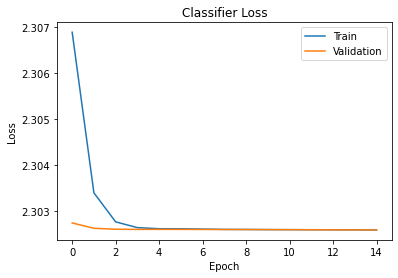

In [89]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Classifier Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

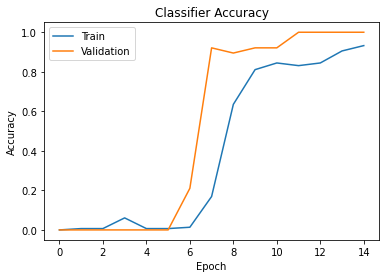

In [90]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Classifier Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()